In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import os
import cv2
import ast


In [2]:
# function to return a vector of frequency of all intensities from 0 to 255

def get_img_vector(img):
    img_vector = np.zeros(256)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            img_vector[img[i][j]] += 1
    return img_vector


#! function to calculate euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    try: 
        distance = 0.0
        for i in range(len(vector1)):
            distance += np.square(vector1[i] - vector2[i])
        distance = np.sqrt(distance)
        return distance
    except Exception as e:
        print("Error")
        print(e)
        # print(i,j)
        return 0

# function to calculate manhattan distance between two vectors
def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 - vector2))

In [3]:

# functions for file handling

def formatString(string):
    string = string.replace("array([", "[")
    string = string.replace("]),array([", "],[")
    string = string.replace("])", "]")
    return string


def convertToArray(string):
    listArr = ast.literal_eval(string)
    return listArr


def tupleToList(listArr):
    array = []
    for i in range(len(listArr)):
        array.append(listArr[i])
    return array

def loadFile(path):
    with open(path, 'r') as f:
        vector = f.read()
        vector = formatString(vector)
        vector = convertToArray(vector)
        vector = tupleToList(vector)
        f.close()
    return vector

        
def saveFile(path, vector):
    with open(path, 'w') as f:
        f.write(str(vector))
        f.close()

In [4]:
normalised_actinic_keratosis_train_vectors = loadFile("../features/normalised/Train/normalised_actinic_keratosis_train_vectors.txt")
normalised_basal_cell_carcinoma_train_vectors = loadFile("../features/normalised/Train/normalised_basal_cell_carcinoma_train_vectors.txt")
normalised_dermatofibroma_train_vectors = loadFile("../features/normalised/Train/normalised_dermatofibroma_train_vectors.txt")
normalised_melanoma_train_vectors = loadFile("../features/normalised/Train/normalised_melanoma_train_vectors.txt")
normalised_nevus_train_vectors = loadFile("../features/normalised/Train/normalised_nevus_train_vectors.txt")
normalised_pigmented_benign_keratosis_train_vectors = loadFile("../features/normalised/Train/normalised_pigmented_benign_keratosis_train_vectors.txt")
normalised_seborrheic_keratosis_train_vectors = loadFile("../features/normalised/Train/normalised_seborrheic_keratosis_train_vectors.txt")
normalised_squamous_cell_carcinoma_train_vectors = loadFile("../features/normalised/Train/normalised_squamous_cell_carcinoma_train_vectors.txt")
normalised_vascular_lesion_train_vectors = loadFile("../features/normalised/Train/normalised_vascular_lesion_train_vectors.txt")

In [5]:
actinic_keratosis_vector_1 = normalised_actinic_keratosis_train_vectors[1]
basal_cell_carcinoma_vector_1 = normalised_basal_cell_carcinoma_train_vectors[1]
dermatofibroma_vector_1 = normalised_dermatofibroma_train_vectors[1]
melanoma_vector_1 = normalised_melanoma_train_vectors[1]
nevus_vector_1 = normalised_nevus_train_vectors[1]
pigmented_benign_keratosis_vector_1 = normalised_pigmented_benign_keratosis_train_vectors[1]
seborrheic_keratosis_vector_1 = normalised_seborrheic_keratosis_train_vectors[1]
squamous_cell_carcinoma_vector_1 = normalised_squamous_cell_carcinoma_train_vectors[1]
vascular_lesion_vector_1 = normalised_vascular_lesion_train_vectors[1]

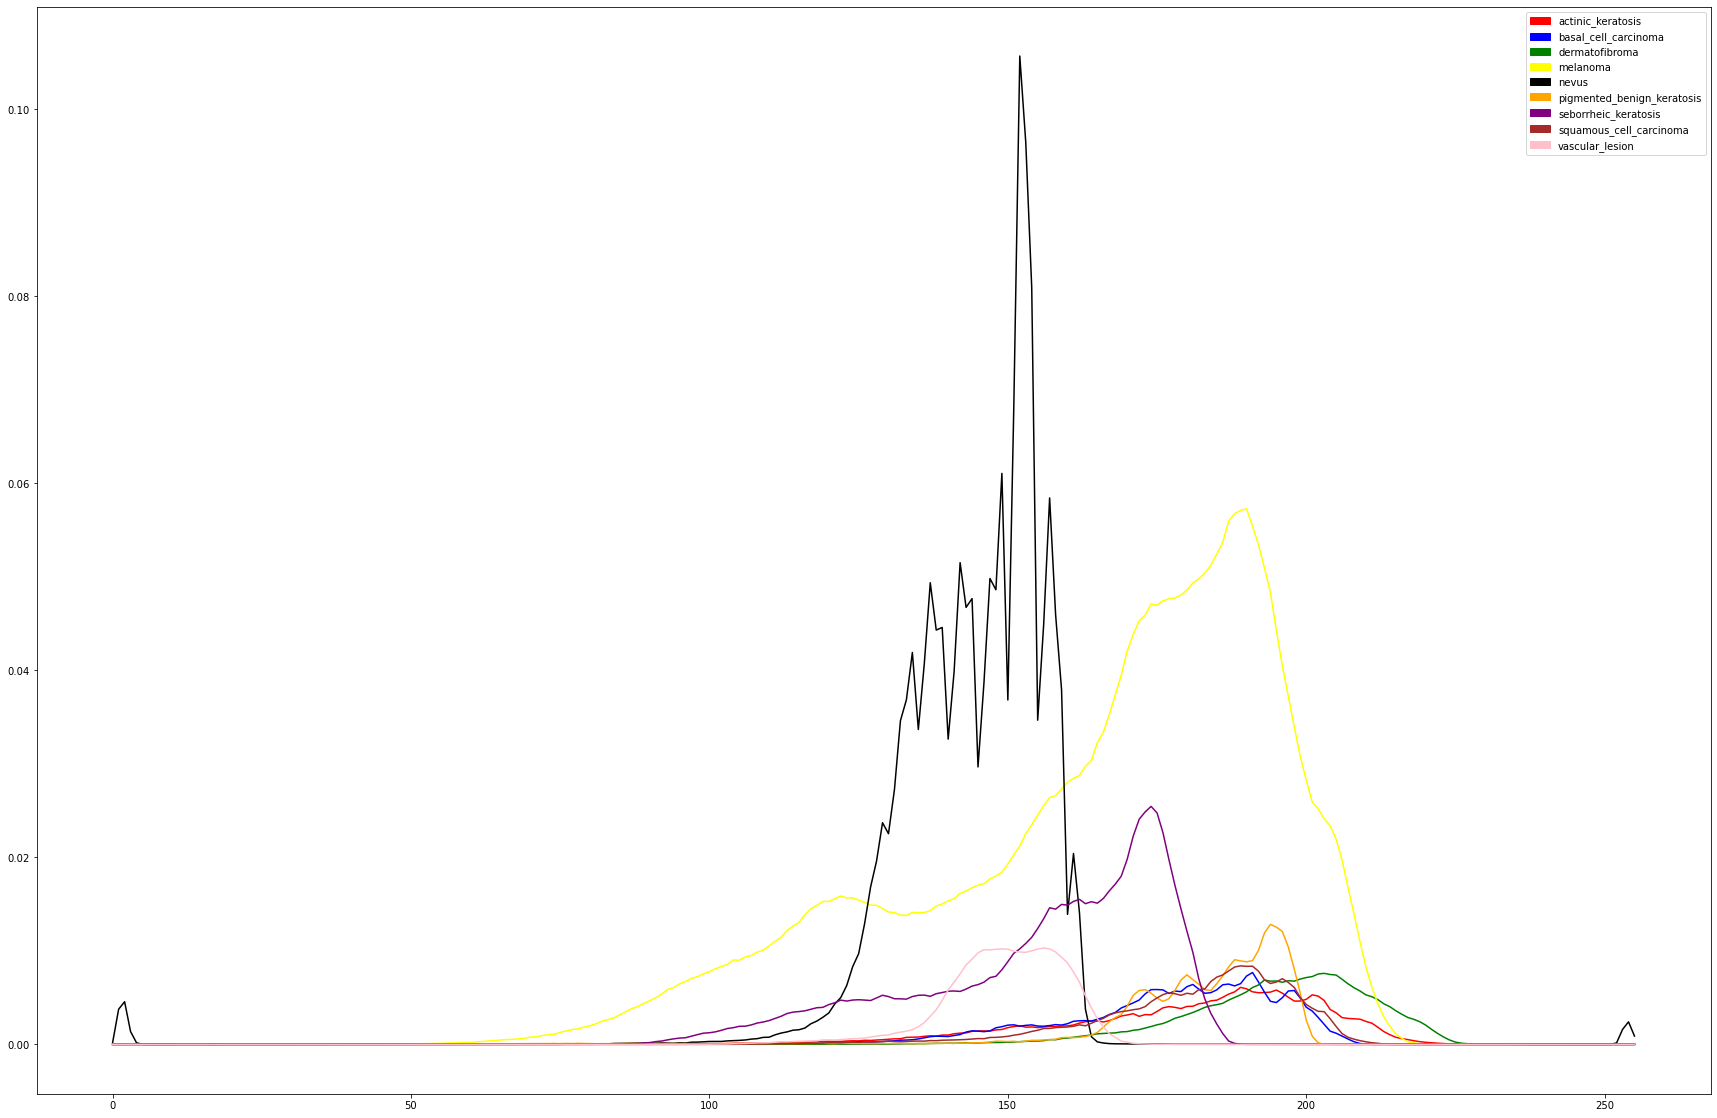

In [36]:
#  plot of all 9 vectors[0]

plt.plot(range(256),actinic_keratosis_vector_1, color='red')
plt.plot(range(256),basal_cell_carcinoma_vector_1, color='blue')
plt.plot(range(256),dermatofibroma_vector_1, color='green')
plt.plot(range(256),melanoma_vector_1, color='yellow')
plt.plot(range(256),nevus_vector_1, color='black')
plt.plot(range(256),pigmented_benign_keratosis_vector_1, color='orange')
plt.plot(range(256),seborrheic_keratosis_vector_1, color='purple')
plt.plot(range(256),squamous_cell_carcinoma_vector_1, color='brown')
plt.plot(range(256),vascular_lesion_vector_1, color='pink')

# legend
red_patch = mpatches.Patch(color='red', label='actinic_keratosis')
blue_patch = mpatches.Patch(color='blue', label='basal_cell_carcinoma')
green_patch = mpatches.Patch(color='green', label='dermatofibroma')
yellow_patch = mpatches.Patch(color='yellow', label='melanoma')
black_patch = mpatches.Patch(color='black', label='nevus')
orange_patch = mpatches.Patch(color='orange', label='pigmented_benign_keratosis')
purple_patch = mpatches.Patch(color='purple', label='seborrheic_keratosis')
brown_patch = mpatches.Patch(color='brown', label='squamous_cell_carcinoma')
pink_patch = mpatches.Patch(color='pink', label='vascular_lesion')

plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch, orange_patch, purple_patch, brown_patch, pink_patch])
# increase the size of graph
plt.rcParams["figure.figsize"] = (50,30)

plt.show()

In [32]:
# actinic_keratosis_train_clusters
# r = 0.008

actinic_keratosis_train_clusters = []
r = 0.008
cluster = []
check= []

for i in range(0,len(normalised_actinic_keratosis_train_vectors)-1):
    cluster = []
    if normalised_actinic_keratosis_train_vectors[i] not in check:
        cluster.append(normalised_actinic_keratosis_train_vectors[i])
        check.append(normalised_actinic_keratosis_train_vectors[i])
    else:
        continue
    for j in range(i+1,len(normalised_actinic_keratosis_train_vectors)):
        if euclidean_distance(normalised_actinic_keratosis_train_vectors[i],normalised_actinic_keratosis_train_vectors[j]) <= r:
            if normalised_actinic_keratosis_train_vectors[j] not in check:
                cluster.append(normalised_actinic_keratosis_train_vectors[j])
                check.append(normalised_actinic_keratosis_train_vectors[j])
    actinic_keratosis_train_clusters.append(cluster)

In [33]:
# print the clusters
sum = 0
for i in range(0,len(actinic_keratosis_train_clusters)):
    print("Actinic Keratosis Cluster -",i+1,": ",len(actinic_keratosis_train_clusters[i]))
    sum = sum + len(actinic_keratosis_train_clusters[i])
print("Total number of vectors in all clusters: ",sum)

Actinic Keratosis Cluster - 1 :  2
Actinic Keratosis Cluster - 2 :  6
Actinic Keratosis Cluster - 3 :  6
Actinic Keratosis Cluster - 4 :  4
Actinic Keratosis Cluster - 5 :  9
Actinic Keratosis Cluster - 6 :  8
Actinic Keratosis Cluster - 7 :  3
Actinic Keratosis Cluster - 8 :  4
Actinic Keratosis Cluster - 9 :  9
Actinic Keratosis Cluster - 10 :  3
Actinic Keratosis Cluster - 11 :  7
Actinic Keratosis Cluster - 12 :  5
Actinic Keratosis Cluster - 13 :  2
Actinic Keratosis Cluster - 14 :  4
Actinic Keratosis Cluster - 15 :  4
Actinic Keratosis Cluster - 16 :  2
Actinic Keratosis Cluster - 17 :  2
Actinic Keratosis Cluster - 18 :  2
Actinic Keratosis Cluster - 19 :  1
Actinic Keratosis Cluster - 20 :  2
Actinic Keratosis Cluster - 21 :  1
Actinic Keratosis Cluster - 22 :  1
Actinic Keratosis Cluster - 23 :  2
Actinic Keratosis Cluster - 24 :  1
Actinic Keratosis Cluster - 25 :  1
Actinic Keratosis Cluster - 26 :  1
Actinic Keratosis Cluster - 27 :  2
Actinic Keratosis Cluster - 28 :  1
A

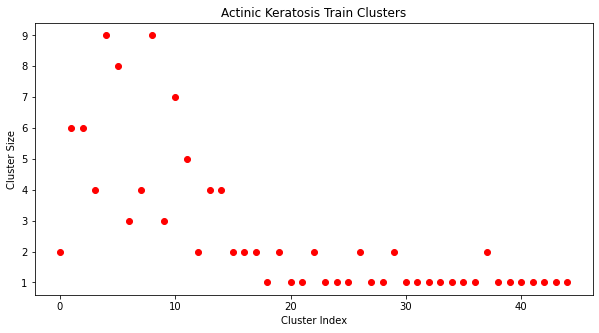

In [42]:

# % plot graph to show cluster index vs cluster size of actinic_keratosis_train_clusters

for i in range(0,len(actinic_keratosis_train_clusters)):
    plt.scatter(i,len(actinic_keratosis_train_clusters[i]), color='red')
plt.title("Actinic Keratosis Train Clusters")
plt.xlabel("Cluster Index")
plt.ylabel("Cluster Size")
# size
plt.rcParams["figure.figsize"] = (10,5)
plt.show()


In [54]:

# save clusters
saveFile("../features/clusters/actinic_keratosis_train_clusters_0.008.txt",actinic_keratosis_train_clusters)

In [43]:
# basal_cell_carcinoma_train_clusters
# r = 0.008

basal_cell_carcinoma_train_clusters = []
r = 0.008
cluster = []
check= []

for i in range(0,len(normalised_basal_cell_carcinoma_train_vectors)-1):
    cluster = []
    if normalised_basal_cell_carcinoma_train_vectors[i] not in check:
        cluster.append(normalised_basal_cell_carcinoma_train_vectors[i])
        check.append(normalised_basal_cell_carcinoma_train_vectors[i])
    else:
        continue
    for j in range(i+1,len(normalised_basal_cell_carcinoma_train_vectors)):
        if euclidean_distance(normalised_basal_cell_carcinoma_train_vectors[i],normalised_basal_cell_carcinoma_train_vectors[j]) <= r:
            if normalised_basal_cell_carcinoma_train_vectors[j] not in check:
                cluster.append(normalised_basal_cell_carcinoma_train_vectors[j])
                check.append(normalised_basal_cell_carcinoma_train_vectors[j])
    basal_cell_carcinoma_train_clusters.append(cluster)

In [44]:
# print the clusters
sum = 0
for i in range(0,len(basal_cell_carcinoma_train_clusters)):
    print("Basal Cell Carcinoma Cluster -",i+1,": ",len(basal_cell_carcinoma_train_clusters[i]))
    sum = sum + len(basal_cell_carcinoma_train_clusters[i])
print("Total number of vectors in all clusters: ",sum)

Basal Cell Carcinoma Cluster - 1 :  8
Basal Cell Carcinoma Cluster - 2 :  10
Basal Cell Carcinoma Cluster - 3 :  15
Basal Cell Carcinoma Cluster - 4 :  6
Basal Cell Carcinoma Cluster - 5 :  2
Basal Cell Carcinoma Cluster - 6 :  7
Basal Cell Carcinoma Cluster - 7 :  5
Basal Cell Carcinoma Cluster - 8 :  3
Basal Cell Carcinoma Cluster - 9 :  11
Basal Cell Carcinoma Cluster - 10 :  8
Basal Cell Carcinoma Cluster - 11 :  4
Basal Cell Carcinoma Cluster - 12 :  3
Basal Cell Carcinoma Cluster - 13 :  8
Basal Cell Carcinoma Cluster - 14 :  2
Basal Cell Carcinoma Cluster - 15 :  12
Basal Cell Carcinoma Cluster - 16 :  1
Basal Cell Carcinoma Cluster - 17 :  2
Basal Cell Carcinoma Cluster - 18 :  1
Basal Cell Carcinoma Cluster - 19 :  2
Basal Cell Carcinoma Cluster - 20 :  11
Basal Cell Carcinoma Cluster - 21 :  2
Basal Cell Carcinoma Cluster - 22 :  3
Basal Cell Carcinoma Cluster - 23 :  1
Basal Cell Carcinoma Cluster - 24 :  4
Basal Cell Carcinoma Cluster - 25 :  1
Basal Cell Carcinoma Cluster 

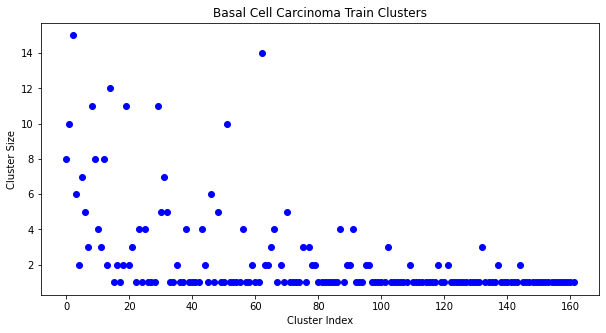

In [45]:

# % plot graph to show cluster index vs cluster size of basal_cell_carcinoma_train_clusters

for i in range(0,len(basal_cell_carcinoma_train_clusters)):
    plt.scatter(i,len(basal_cell_carcinoma_train_clusters[i]), color='blue')
plt.title("Basal Cell Carcinoma Train Clusters")
plt.xlabel("Cluster Index")
plt.ylabel("Cluster Size")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [55]:

# save clusters
saveFile("../features/clusters/basal_cell_carcinoma_train_clusters_0.008.txt",basal_cell_carcinoma_train_clusters)

In [46]:

# dermatofibroma_train_clusters
# r = 0.008

dermatofibroma_train_clusters = []
r = 0.008
cluster = []
check= []

for i in range(0,len(normalised_dermatofibroma_train_vectors)-1):
    cluster = []
    if normalised_dermatofibroma_train_vectors[i] not in check:
        cluster.append(normalised_dermatofibroma_train_vectors[i])
        check.append(normalised_dermatofibroma_train_vectors[i])
    else:
        continue
    for j in range(i+1,len(normalised_dermatofibroma_train_vectors)):
        if euclidean_distance(normalised_dermatofibroma_train_vectors[i],normalised_dermatofibroma_train_vectors[j]) <= r:
            if normalised_dermatofibroma_train_vectors[j] not in check:
                cluster.append(normalised_dermatofibroma_train_vectors[j])
                check.append(normalised_dermatofibroma_train_vectors[j])
    dermatofibroma_train_clusters.append(cluster)

In [47]:

# print the clusters
sum = 0
for i in range(0,len(dermatofibroma_train_clusters)):
    print("Dermatofibroma Cluster -",i+1,": ",len(dermatofibroma_train_clusters[i]))
    sum = sum + len(dermatofibroma_train_clusters[i])
print("Total number of vectors in all clusters: ",sum)

Dermatofibroma Cluster - 1 :  1
Dermatofibroma Cluster - 2 :  2
Dermatofibroma Cluster - 3 :  1
Dermatofibroma Cluster - 4 :  5
Dermatofibroma Cluster - 5 :  2
Dermatofibroma Cluster - 6 :  1
Dermatofibroma Cluster - 7 :  1
Dermatofibroma Cluster - 8 :  3
Dermatofibroma Cluster - 9 :  1
Dermatofibroma Cluster - 10 :  2
Dermatofibroma Cluster - 11 :  2
Dermatofibroma Cluster - 12 :  1
Dermatofibroma Cluster - 13 :  1
Dermatofibroma Cluster - 14 :  3
Dermatofibroma Cluster - 15 :  2
Dermatofibroma Cluster - 16 :  1
Dermatofibroma Cluster - 17 :  4
Dermatofibroma Cluster - 18 :  1
Dermatofibroma Cluster - 19 :  1
Dermatofibroma Cluster - 20 :  1
Dermatofibroma Cluster - 21 :  1
Dermatofibroma Cluster - 22 :  2
Dermatofibroma Cluster - 23 :  4
Dermatofibroma Cluster - 24 :  2
Dermatofibroma Cluster - 25 :  1
Dermatofibroma Cluster - 26 :  1
Dermatofibroma Cluster - 27 :  1
Dermatofibroma Cluster - 28 :  1
Dermatofibroma Cluster - 29 :  1
Dermatofibroma Cluster - 30 :  3
Dermatofibroma Clus

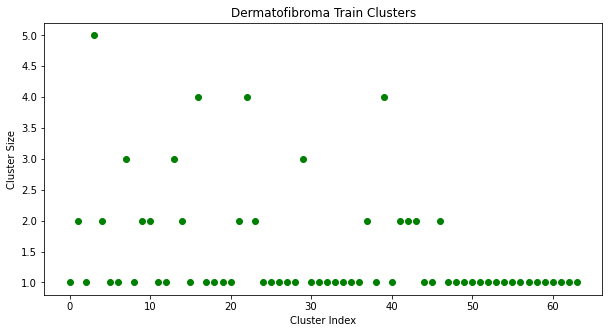

In [48]:

# % plot graph to show cluster index vs cluster size of dermatofibroma_train_clusters

for i in range(0,len(dermatofibroma_train_clusters)):
    plt.scatter(i,len(dermatofibroma_train_clusters[i]), color='green')
plt.title("Dermatofibroma Train Clusters")
plt.xlabel("Cluster Index")
plt.ylabel("Cluster Size")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [56]:

# save clusters
saveFile("../features/clusters/dermatofibroma_train_clusters_0.008.txt",dermatofibroma_train_clusters)

In [59]:

# melanoma_train_clusters
# r = 0.05

melanoma_train_clusters = []
r = 0.05
cluster = []
check= []

for i in range(0,len(normalised_melanoma_train_vectors)-1):
    cluster = []
    if normalised_melanoma_train_vectors[i] not in check:
        cluster.append(normalised_melanoma_train_vectors[i])
        check.append(normalised_melanoma_train_vectors[i])
    else:
        continue
    for j in range(i+1,len(normalised_melanoma_train_vectors)):
        if euclidean_distance(normalised_melanoma_train_vectors[i],normalised_melanoma_train_vectors[j]) <= r:
            if normalised_melanoma_train_vectors[j] not in check:
                cluster.append(normalised_melanoma_train_vectors[j])
                check.append(normalised_melanoma_train_vectors[j])
    melanoma_train_clusters.append(cluster)

In [60]:

# print the clusters
sum = 0
for i in range(0,len(melanoma_train_clusters)):
    print("Melanoma Cluster -",i+1,": ",len(melanoma_train_clusters[i]))
    sum = sum + len(melanoma_train_clusters[i])
print("Total number of vectors in all clusters: ",sum)

Melanoma Cluster - 1 :  1
Melanoma Cluster - 2 :  1
Melanoma Cluster - 3 :  1
Melanoma Cluster - 4 :  7
Melanoma Cluster - 5 :  1
Melanoma Cluster - 6 :  10
Melanoma Cluster - 7 :  44
Melanoma Cluster - 8 :  28
Melanoma Cluster - 9 :  36
Melanoma Cluster - 10 :  3
Melanoma Cluster - 11 :  1
Melanoma Cluster - 12 :  15
Melanoma Cluster - 13 :  1
Melanoma Cluster - 14 :  2
Melanoma Cluster - 15 :  1
Melanoma Cluster - 16 :  1
Melanoma Cluster - 17 :  1
Melanoma Cluster - 18 :  1
Melanoma Cluster - 19 :  3
Melanoma Cluster - 20 :  1
Melanoma Cluster - 21 :  1
Melanoma Cluster - 22 :  8
Melanoma Cluster - 23 :  17
Melanoma Cluster - 24 :  41
Melanoma Cluster - 25 :  1
Melanoma Cluster - 26 :  1
Melanoma Cluster - 27 :  1
Melanoma Cluster - 28 :  1
Melanoma Cluster - 29 :  1
Melanoma Cluster - 30 :  1
Melanoma Cluster - 31 :  1
Melanoma Cluster - 32 :  1
Melanoma Cluster - 33 :  1
Melanoma Cluster - 34 :  1
Melanoma Cluster - 35 :  1
Melanoma Cluster - 36 :  1
Melanoma Cluster - 37 :  1
Mel

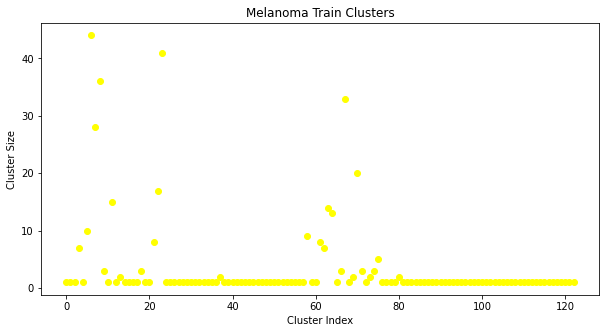

In [61]:

# % plot graph to show cluster index vs cluster size of melanoma_train_clusters

for i in range(0,len(melanoma_train_clusters)):
    plt.scatter(i,len(melanoma_train_clusters[i]), color='yellow')
plt.title("Melanoma Train Clusters")
plt.xlabel("Cluster Index")
plt.ylabel("Cluster Size")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [62]:

# save clusters
saveFile("../features/clusters/melanoma_train_clusters_0.05.txt",melanoma_train_clusters)

In [73]:

# nevus_train_clusters
# r = 0.008

nevus_train_clusters = []
r = 0.05
cluster = []
check= []

for i in range(0,len(normalised_nevus_train_vectors)-1):
    cluster = []
    if normalised_nevus_train_vectors[i] not in check:
        cluster.append(normalised_nevus_train_vectors[i])
        check.append(normalised_nevus_train_vectors[i])
    else:
        continue
    for j in range(i+1,len(normalised_nevus_train_vectors)):
        if euclidean_distance(normalised_nevus_train_vectors[i],normalised_nevus_train_vectors[j]) <= r:
            if normalised_nevus_train_vectors[j] not in check:
                cluster.append(normalised_nevus_train_vectors[j])
                check.append(normalised_nevus_train_vectors[j])
    nevus_train_clusters.append(cluster)

In [74]:

# print the clusters
sum = 0
for i in range(0,len(nevus_train_clusters)):
    print("Nevus Cluster -",i+1,": ",len(nevus_train_clusters[i]))
    sum = sum + len(nevus_train_clusters[i])
print("Total number of vectors in all clusters: ",sum)

Nevus Cluster - 1 :  1
Nevus Cluster - 2 :  1
Nevus Cluster - 3 :  139
Nevus Cluster - 4 :  14
Nevus Cluster - 5 :  1
Nevus Cluster - 6 :  1
Nevus Cluster - 7 :  1
Nevus Cluster - 8 :  1
Nevus Cluster - 9 :  3
Nevus Cluster - 10 :  1
Nevus Cluster - 11 :  1
Nevus Cluster - 12 :  1
Nevus Cluster - 13 :  1
Nevus Cluster - 14 :  1
Nevus Cluster - 15 :  1
Nevus Cluster - 16 :  1
Nevus Cluster - 17 :  1
Nevus Cluster - 18 :  1
Nevus Cluster - 19 :  1
Nevus Cluster - 20 :  1
Nevus Cluster - 21 :  1
Nevus Cluster - 22 :  1
Nevus Cluster - 23 :  1
Nevus Cluster - 24 :  1
Nevus Cluster - 25 :  1
Nevus Cluster - 26 :  1
Nevus Cluster - 27 :  1
Nevus Cluster - 28 :  1
Nevus Cluster - 29 :  1
Nevus Cluster - 30 :  1
Nevus Cluster - 31 :  1
Nevus Cluster - 32 :  1
Nevus Cluster - 33 :  1
Nevus Cluster - 34 :  1
Nevus Cluster - 35 :  1
Nevus Cluster - 36 :  1
Nevus Cluster - 37 :  1
Nevus Cluster - 38 :  1
Nevus Cluster - 39 :  1
Nevus Cluster - 40 :  1
Nevus Cluster - 41 :  1
Nevus Cluster - 42 :  

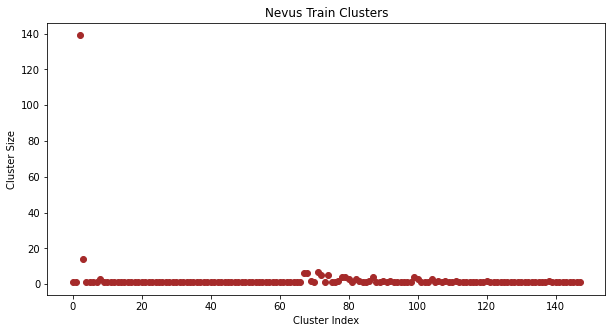

In [75]:

# % plot graph to show cluster index vs cluster size of nevus_train_clusters

for i in range(0,len(nevus_train_clusters)):
    plt.scatter(i,len(nevus_train_clusters[i]), color='brown')
plt.title("Nevus Train Clusters")
plt.xlabel("Cluster Index")
plt.ylabel("Cluster Size")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [76]:

# save clusters
saveFile("../features/clusters/nevus_train_clusters_0.05.txt",nevus_train_clusters)

In [79]:

# pigmented benign keratosis_train_clusters
# r = 0.008

pigmented_benign_keratosis_train_clusters = []
r = 0.008
cluster = []
check= []

for i in range(0,len(normalised_pigmented_benign_keratosis_train_vectors)-1):
    cluster = []
    if normalised_pigmented_benign_keratosis_train_vectors[i] not in check:
        cluster.append(normalised_pigmented_benign_keratosis_train_vectors[i])
        check.append(normalised_pigmented_benign_keratosis_train_vectors[i])
    else:
        continue
    for j in range(i+1,len(normalised_pigmented_benign_keratosis_train_vectors)):
        if euclidean_distance(normalised_pigmented_benign_keratosis_train_vectors[i],normalised_pigmented_benign_keratosis_train_vectors[j]) <= r:
            if normalised_pigmented_benign_keratosis_train_vectors[j] not in check:
                cluster.append(normalised_pigmented_benign_keratosis_train_vectors[j])
                check.append(normalised_pigmented_benign_keratosis_train_vectors[j])
    pigmented_benign_keratosis_train_clusters.append(cluster)

In [80]:

# print the clusters
sum = 0
for i in range(0,len(pigmented_benign_keratosis_train_clusters)):
    print("Pigmented Benign Keratosis Cluster -",i+1,": ",len(pigmented_benign_keratosis_train_clusters[i]))
    sum = sum + len(pigmented_benign_keratosis_train_clusters[i])
print("Total number of vectors in all clusters: ",sum)

Pigmented Benign Keratosis Cluster - 1 :  13
Pigmented Benign Keratosis Cluster - 2 :  1
Pigmented Benign Keratosis Cluster - 3 :  8
Pigmented Benign Keratosis Cluster - 4 :  1
Pigmented Benign Keratosis Cluster - 5 :  16
Pigmented Benign Keratosis Cluster - 6 :  19
Pigmented Benign Keratosis Cluster - 7 :  1
Pigmented Benign Keratosis Cluster - 8 :  3
Pigmented Benign Keratosis Cluster - 9 :  11
Pigmented Benign Keratosis Cluster - 10 :  2
Pigmented Benign Keratosis Cluster - 11 :  6
Pigmented Benign Keratosis Cluster - 12 :  3
Pigmented Benign Keratosis Cluster - 13 :  2
Pigmented Benign Keratosis Cluster - 14 :  9
Pigmented Benign Keratosis Cluster - 15 :  4
Pigmented Benign Keratosis Cluster - 16 :  4
Pigmented Benign Keratosis Cluster - 17 :  6
Pigmented Benign Keratosis Cluster - 18 :  1
Pigmented Benign Keratosis Cluster - 19 :  4
Pigmented Benign Keratosis Cluster - 20 :  17
Pigmented Benign Keratosis Cluster - 21 :  5
Pigmented Benign Keratosis Cluster - 22 :  10
Pigmented Ben

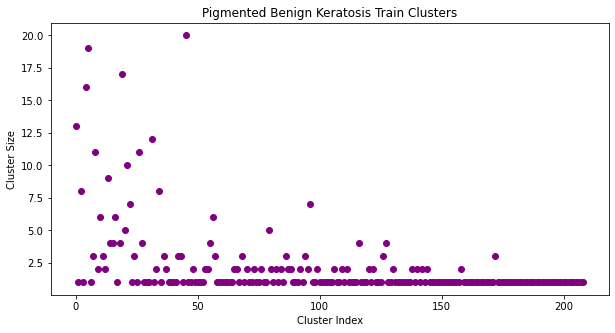

In [81]:

# % plot graph to show cluster index vs cluster size of pigmented_benign_keratosis_train_clusters

for i in range(0,len(pigmented_benign_keratosis_train_clusters)):
    plt.scatter(i,len(pigmented_benign_keratosis_train_clusters[i]), color='purple')
plt.title("Pigmented Benign Keratosis Train Clusters")
plt.xlabel("Cluster Index")
plt.ylabel("Cluster Size")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [82]:

# save clusters
saveFile("../features/clusters/pigmented_benign_keratosis_train_clusters_0.008.txt",pigmented_benign_keratosis_train_clusters)

In [65]:

# seborrheic_keratosis_train_clusters
# r = 0.05

seborrheic_keratosis_train_clusters = []
r = 0.05
cluster = []
check= []

for i in range(0,len(normalised_seborrheic_keratosis_train_vectors)-1):
    cluster = []
    if normalised_seborrheic_keratosis_train_vectors[i] not in check:
        cluster.append(normalised_seborrheic_keratosis_train_vectors[i])
        check.append(normalised_seborrheic_keratosis_train_vectors[i])
    else:
        continue
    for j in range(i+1,len(normalised_seborrheic_keratosis_train_vectors)):
        if euclidean_distance(normalised_seborrheic_keratosis_train_vectors[i],normalised_seborrheic_keratosis_train_vectors[j]) <= r:
            if normalised_seborrheic_keratosis_train_vectors[j] not in check:
                cluster.append(normalised_seborrheic_keratosis_train_vectors[j])
                check.append(normalised_seborrheic_keratosis_train_vectors[j])
    seborrheic_keratosis_train_clusters.append(cluster)

In [66]:

# print the clusters
sum = 0
for i in range(0,len(seborrheic_keratosis_train_clusters)):
    print("Seborrheic Keratosis Cluster -",i+1,": ",len(seborrheic_keratosis_train_clusters[i]))
    sum = sum + len(seborrheic_keratosis_train_clusters[i])
print("Total number of vectors in all clusters: ",sum)

Seborrheic Keratosis Cluster - 1 :  5
Seborrheic Keratosis Cluster - 2 :  13
Seborrheic Keratosis Cluster - 3 :  7
Seborrheic Keratosis Cluster - 4 :  10
Seborrheic Keratosis Cluster - 5 :  10
Seborrheic Keratosis Cluster - 6 :  3
Seborrheic Keratosis Cluster - 7 :  8
Seborrheic Keratosis Cluster - 8 :  2
Seborrheic Keratosis Cluster - 9 :  3
Seborrheic Keratosis Cluster - 10 :  1
Seborrheic Keratosis Cluster - 11 :  1
Seborrheic Keratosis Cluster - 12 :  2
Seborrheic Keratosis Cluster - 13 :  6
Seborrheic Keratosis Cluster - 14 :  2
Seborrheic Keratosis Cluster - 15 :  1
Seborrheic Keratosis Cluster - 16 :  1
Seborrheic Keratosis Cluster - 17 :  1
Seborrheic Keratosis Cluster - 18 :  1
Total number of vectors in all clusters:  77


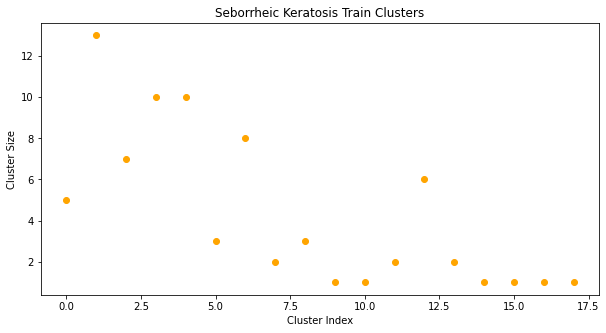

In [67]:

# % plot graph to show cluster index vs cluster size of seborrheic_keratosis_train_clusters

for i in range(0,len(seborrheic_keratosis_train_clusters)):
    plt.scatter(i,len(seborrheic_keratosis_train_clusters[i]), color='orange')
plt.title("Seborrheic Keratosis Train Clusters")
plt.xlabel("Cluster Index")
plt.ylabel("Cluster Size")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [68]:

# save clusters
saveFile("../features/clusters/seborrheic_keratosis_train_clusters_0.05.txt",seborrheic_keratosis_train_clusters)

In [83]:

# squamous_cell_carcinoma_train_clusters
# r = 0.008

squamous_cell_carcinoma_train_clusters = []
r = 0.008
cluster = []
check= []

for i in range(0,len(normalised_squamous_cell_carcinoma_train_vectors)-1):
    cluster = []
    if normalised_squamous_cell_carcinoma_train_vectors[i] not in check:
        cluster.append(normalised_squamous_cell_carcinoma_train_vectors[i])
        check.append(normalised_squamous_cell_carcinoma_train_vectors[i])
    else:
        continue
    for j in range(i+1,len(normalised_squamous_cell_carcinoma_train_vectors)):
        if euclidean_distance(normalised_squamous_cell_carcinoma_train_vectors[i],normalised_squamous_cell_carcinoma_train_vectors[j]) <= r:
            if normalised_squamous_cell_carcinoma_train_vectors[j] not in check:
                cluster.append(normalised_squamous_cell_carcinoma_train_vectors[j])
                check.append(normalised_squamous_cell_carcinoma_train_vectors[j])
    squamous_cell_carcinoma_train_clusters.append(cluster)

In [84]:

# print the clusters
sum = 0
for i in range(0,len(squamous_cell_carcinoma_train_clusters)):
    print("Squamous Cell Carcinoma Cluster -",i+1,": ",len(squamous_cell_carcinoma_train_clusters[i]))
    sum = sum + len(squamous_cell_carcinoma_train_clusters[i])
print("Total number of vectors in all clusters: ",sum)

Squamous Cell Carcinoma Cluster - 1 :  3
Squamous Cell Carcinoma Cluster - 2 :  4
Squamous Cell Carcinoma Cluster - 3 :  1
Squamous Cell Carcinoma Cluster - 4 :  1
Squamous Cell Carcinoma Cluster - 5 :  4
Squamous Cell Carcinoma Cluster - 6 :  9
Squamous Cell Carcinoma Cluster - 7 :  14
Squamous Cell Carcinoma Cluster - 8 :  13
Squamous Cell Carcinoma Cluster - 9 :  4
Squamous Cell Carcinoma Cluster - 10 :  4
Squamous Cell Carcinoma Cluster - 11 :  2
Squamous Cell Carcinoma Cluster - 12 :  2
Squamous Cell Carcinoma Cluster - 13 :  4
Squamous Cell Carcinoma Cluster - 14 :  2
Squamous Cell Carcinoma Cluster - 15 :  6
Squamous Cell Carcinoma Cluster - 16 :  4
Squamous Cell Carcinoma Cluster - 17 :  1
Squamous Cell Carcinoma Cluster - 18 :  1
Squamous Cell Carcinoma Cluster - 19 :  1
Squamous Cell Carcinoma Cluster - 20 :  6
Squamous Cell Carcinoma Cluster - 21 :  1
Squamous Cell Carcinoma Cluster - 22 :  1
Squamous Cell Carcinoma Cluster - 23 :  4
Squamous Cell Carcinoma Cluster - 24 :  1

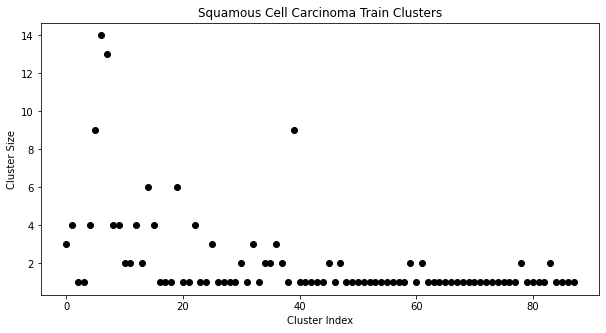

In [86]:

# % plot graph to show cluster index vs cluster size of squamous_cell_carcinoma_train_clusters

for i in range(0,len(squamous_cell_carcinoma_train_clusters)):
    plt.scatter(i,len(squamous_cell_carcinoma_train_clusters[i]), color='black')
plt.title("Squamous Cell Carcinoma Train Clusters")
plt.xlabel("Cluster Index")
plt.ylabel("Cluster Size")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [87]:

# save clusters
saveFile("../features/clusters/squamous_cell_carcinoma_train_clusters_0.008.txt",squamous_cell_carcinoma_train_clusters)

In [88]:

# vascular_lesion_train_clusters
# r = 0.008

vascular_lesion_train_clusters = []
r = 0.008
cluster = []
check= []

for i in range(0,len(normalised_vascular_lesion_train_vectors)-1):
    cluster = []
    if normalised_vascular_lesion_train_vectors[i] not in check:
        cluster.append(normalised_vascular_lesion_train_vectors[i])
        check.append(normalised_vascular_lesion_train_vectors[i])
    else:
        continue
    for j in range(i+1,len(normalised_vascular_lesion_train_vectors)):
        if euclidean_distance(normalised_vascular_lesion_train_vectors[i],normalised_vascular_lesion_train_vectors[j]) <= r:
            if normalised_vascular_lesion_train_vectors[j] not in check:
                cluster.append(normalised_vascular_lesion_train_vectors[j])
                check.append(normalised_vascular_lesion_train_vectors[j])
    vascular_lesion_train_clusters.append(cluster)

In [89]:

# print the clusters
sum = 0
for i in range(0,len(vascular_lesion_train_clusters)):
    print("Vascular Lesion Cluster -",i+1,": ",len(vascular_lesion_train_clusters[i]))
    sum = sum + len(vascular_lesion_train_clusters[i])
print("Total number of vectors in all clusters: ",sum)

Vascular Lesion Cluster - 1 :  1
Vascular Lesion Cluster - 2 :  1
Vascular Lesion Cluster - 3 :  2
Vascular Lesion Cluster - 4 :  1
Vascular Lesion Cluster - 5 :  1
Vascular Lesion Cluster - 6 :  1
Vascular Lesion Cluster - 7 :  3
Vascular Lesion Cluster - 8 :  1
Vascular Lesion Cluster - 9 :  7
Vascular Lesion Cluster - 10 :  2
Vascular Lesion Cluster - 11 :  1
Vascular Lesion Cluster - 12 :  1
Vascular Lesion Cluster - 13 :  1
Vascular Lesion Cluster - 14 :  1
Vascular Lesion Cluster - 15 :  1
Vascular Lesion Cluster - 16 :  2
Vascular Lesion Cluster - 17 :  1
Vascular Lesion Cluster - 18 :  1
Vascular Lesion Cluster - 19 :  3
Vascular Lesion Cluster - 20 :  4
Vascular Lesion Cluster - 21 :  1
Vascular Lesion Cluster - 22 :  1
Vascular Lesion Cluster - 23 :  3
Vascular Lesion Cluster - 24 :  1
Vascular Lesion Cluster - 25 :  1
Vascular Lesion Cluster - 26 :  1
Vascular Lesion Cluster - 27 :  1
Vascular Lesion Cluster - 28 :  2
Vascular Lesion Cluster - 29 :  3
Vascular Lesion Cluster

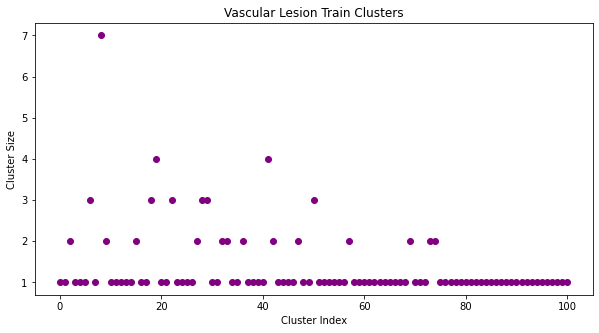

In [90]:

# % plot graph to show cluster index vs cluster size of vascular_lesion_train_clusters

for i in range(0,len(vascular_lesion_train_clusters)):
    plt.scatter(i,len(vascular_lesion_train_clusters[i]), color='purple')
plt.title("Vascular Lesion Train Clusters")
plt.xlabel("Cluster Index")
plt.ylabel("Cluster Size")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()


In [ ]:

# save clusters
saveFile("../features/clusters/vascular_lesion_train_clusters_0.008.txt",vascular_lesion_train_clusters)